# Методы машинного обучения.

## ЛР4. - Анализ социологического исследования.

В Файле данные содержатся результат опроса населения о его условиях существования. Переменные разбиты на 2 класса - "Признаки состояния" - это субъективная оценка населения своего бытия и "Признаки причины" - объектные количественные признаки оценивающие жизнедеятельность индивида и социума, в котором он проживает.

К признакам состояния относятся:
1.	Оценка благополучия
2.	Оценка социальной поддержки
3.	Ожидаемая продолжительность здоровой жизни
4.	Свобода граждан самостоятельно принимать жизненно важные решения
5.	Индекс Щедрости
6.	Индекс отношения к коррупции
7.	Оценка риска безработицы
8.	Индекс кредитного оптимизма
9.	Индекс страха социальных конфликтов
10.	Индекс семьи
11.	Индекс продовольственной безопасности
12.	Чувство технологического прогресса
13.	Чувство неравенства доходов в обществе

К индивидуальным признакам причины относятся:
1.	Среднегодовой доход, тыс. $
2.	Объем потребленного алкоголя в год, л.
3.	Количество членов семьи
4.	Количество лет образования
5.	Доля от дохода семьи, которая тратится на продовольствие, %

К общественным признакам причины относятся:
1.	Коэффициент Джини сообщества - показатель степени расслоения общества по какому-либо социальному признаку. Одними из ключевых признаков, по которым рассчитывается коэффициент Джини, является уровень доходов и активов домохозяйств. Показатель может варьироваться в диапазоне от 0 до 1, и чем больше его значение, тем большее расслоение общества он отражает.
2.	Издержки сообщества на окружающую среду, млн. $
3.	Охват беспроводной связи в сообществе, %
4.	Количество смертей от вирусных и респираторных заболеваний в сообществе, тыс. человек
5.	Волатильность потребительских цен в сообществе

Индивидуальные показатели характеризуют непосредственно индивида, общественные - сообщество в котором он проживает. В выборке могут присутствовать по несколько человек из одного сообщества. Все их общественные характеристики таким образом будут совпадать. В данных, относящихся к признакам состояния,  присутствуют пропуски.

Задание:
- Определить влияние признаков причины на признаки состояния.
- Выявить корреляционные зависимости.
- Заполнить пропуски в данных.


## Выполнение

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import re
import math

pd.options.mode.copy_on_write = True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ml_lab_04/ММО_ЛР4_Исходные данные.xlsx')
dataset

,Респондент,Сообщество,"Среднегодовой.доход,.тыс..$","Объем.потребленного.алкоголя.в.год,.л.",Количество.членов.семьи,Количество.лет.образования,"Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%",Коэффициент.Джини.сообщества,"Издержки.сообщества.на.окружающую.среду,.млн..$","Охват.беспроводной.связи.в.сообществе,.%",...,Свобода.граждан.самостоятельно.принимать.жизненно.важные.решения,Индекс.Щедрости,Индекс.отношения.к.коррупции,Оценка.риска.безработицы,Индекс.кредитного.оптимизма,Индекс.страха.социальных.конфликтов,Индекс.семьи,Индекс.продовольственной.безопасности,Чувство.технологического.прогресса,Чувство.неравенства.доходов.в.обществе
0,Респондент 1,Сообщество 480,21.350,62,4,5,65,0.608084,197.16,0.330140,...,78.0,67.0,69.0,71.0,38.0,92.0,11.0,95.0,16.0,14.0
1,Респондент 2,Сообщество 130,622.613,30,7,21,39,0.369140,297.10,0.580329,...,9.0,49.0,29.0,36.0,66.0,31.0,49.0,3.0,72.0,60.0
2,Респондент 3,Сообщество 156,400.896,45,2,8,45,0.345094,305.32,0.624832,...,35.0,19.0,73.0,49.0,61.0,19.0,39.0,82.0,38.0,60.0
3,Респондент 4,Сообщество 69,375.950,56,5,10,68,0.635868,78.78,0.240157,...,95.0,83.0,50.0,67.0,35.0,77.0,28.0,50.0,33.0,1.0
4,Респондент 5,Сообщество 330,925.782,39,6,18,38,0.787911,93.35,0.229719,...,84.0,76.0,62.0,44.0,40.0,86.0,51.0,76.0,64.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,Респондент 35996,Сообщество 318,412.715,46,3,11,50,0.921816,59.51,0.227329,...,80.0,14.0,80.0,53.0,30.0,35.0,24.0,29.0,33.0,11.0
35996,Респондент 35997,Сообщество 384,373.757,48,1,8,50,0.620469,144.79,0.385055,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35997,Респондент 35998,Сообщество 331,374.882,38,1,18,39,0.498873,207.14,0.495535,...,28.0,10.0,76.0,27.0,63.0,96.0,35.0,58.0,55.0,2.0
35998,Респондент 35999,Сообщество 402,412.314,51,3,12,44,0.663517,108.70,0.269634,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_dataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ml_lab_04/ММО_ЛР4_Данные для проверки.xlsx')
test_dataset

,Респондент,Сообщество,"Среднегодовой.доход,.тыс..$","Объем.потребленного.алкоголя.в.год,.л.",Количество.членов.семьи,Количество.лет.образования,"Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%",Коэффициент.Джини.сообщества,"Издержки.сообщества.на.окружающую.среду,.млн..$","Охват.беспроводной.связи.в.сообществе,.%",...,Индекс Щедрости,Индекс отношения к коррупции,Оценка риска безработицы,Индекс кредитного оптимизма,Индекс страха социальных конфликтов,Индекс семьи,Индекс продовольственной безопасности,Чувство технологического прогресса,Чувство неравенства доходов в обществе,Пропуски
0,Респондент 1,Сообщество 480,21.350,62,4,5,65,0.608084,197.16,0.330140,...,67,69,71,38,92,11,95,16,14,NaN
1,Респондент 2,Сообщество 130,622.613,30,7,21,39,0.369140,297.10,0.580329,...,49,29,36,66,31,49,3,72,60,NaN
2,Респондент 3,Сообщество 156,400.896,45,2,8,45,0.345094,305.32,0.624832,...,19,73,49,61,19,39,82,38,60,NaN
3,Респондент 4,Сообщество 69,375.950,56,5,10,68,0.635868,78.78,0.240157,...,83,50,67,35,77,28,50,33,1,NaN
4,Респондент 5,Сообщество 330,925.782,39,6,18,38,0.787911,93.35,0.229719,...,76,62,44,40,86,51,76,64,55,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,Респондент 35996,Сообщество 318,412.715,46,3,11,50,0.921816,59.51,0.227329,...,14,80,53,30,35,24,29,33,11,NaN
35996,Респондент 35997,Сообщество 384,373.757,48,1,8,50,0.620469,144.79,0.385055,...,73,53,52,44,48,29,6,30,37,+
35997,Респондент 35998,Сообщество 331,374.882,38,1,18,39,0.498873,207.14,0.495535,...,10,76,27,63,96,35,58,55,2,NaN
35998,Респондент 35999,Сообщество 402,412.314,51,3,12,44,0.663517,108.70,0.269634,...,90,30,49,42,94,30,52,39,67,+


In [ ]:
test_dataset['Сообщество'] = test_dataset['Сообщество'].apply(lambda it: re.findall(r'\b\d+\b', it)[0])
test_dataset['Респондент'] = test_dataset['Респондент'].apply(lambda it: re.findall(r'\b\d+\b', it)[0])

dataset['Сообщество'] = dataset['Сообщество'].apply(lambda it: re.findall(r'\b\d+\b', it)[0])
dataset['Респондент'] = dataset['Респондент'].apply(lambda it: re.findall(r'\b\d+\b', it)[0])
dataset

,Респондент,Сообщество,"Среднегодовой.доход,.тыс..$","Объем.потребленного.алкоголя.в.год,.л.",Количество.членов.семьи,Количество.лет.образования,"Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%",Коэффициент.Джини.сообщества,"Издержки.сообщества.на.окружающую.среду,.млн..$","Охват.беспроводной.связи.в.сообществе,.%",...,Свобода.граждан.самостоятельно.принимать.жизненно.важные.решения,Индекс.Щедрости,Индекс.отношения.к.коррупции,Оценка.риска.безработицы,Индекс.кредитного.оптимизма,Индекс.страха.социальных.конфликтов,Индекс.семьи,Индекс.продовольственной.безопасности,Чувство.технологического.прогресса,Чувство.неравенства.доходов.в.обществе
0,1,480,21.350,62,4,5,65,0.608084,197.16,0.330140,...,78.0,67.0,69.0,71.0,38.0,92.0,11.0,95.0,16.0,14.0
1,2,130,622.613,30,7,21,39,0.369140,297.10,0.580329,...,9.0,49.0,29.0,36.0,66.0,31.0,49.0,3.0,72.0,60.0
2,3,156,400.896,45,2,8,45,0.345094,305.32,0.624832,...,35.0,19.0,73.0,49.0,61.0,19.0,39.0,82.0,38.0,60.0
3,4,69,375.950,56,5,10,68,0.635868,78.78,0.240157,...,95.0,83.0,50.0,67.0,35.0,77.0,28.0,50.0,33.0,1.0
4,5,330,925.782,39,6,18,38,0.787911,93.35,0.229719,...,84.0,76.0,62.0,44.0,40.0,86.0,51.0,76.0,64.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,35996,318,412.715,46,3,11,50,0.921816,59.51,0.227329,...,80.0,14.0,80.0,53.0,30.0,35.0,24.0,29.0,33.0,11.0
35996,35997,384,373.757,48,1,8,50,0.620469,144.79,0.385055,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35997,35998,331,374.882,38,1,18,39,0.498873,207.14,0.495535,...,28.0,10.0,76.0,27.0,63.0,96.0,35.0,58.0,55.0,2.0
35998,35999,402,412.314,51,3,12,44,0.663517,108.70,0.269634,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
unknowns_dataset = dataset[pd.isnull(dataset['Оценка.благополучия'])]
unknowns_dataset

,Респондент,Сообщество,"Среднегодовой.доход,.тыс..$","Объем.потребленного.алкоголя.в.год,.л.",Количество.членов.семьи,Количество.лет.образования,"Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%",Коэффициент.Джини.сообщества,"Издержки.сообщества.на.окружающую.среду,.млн..$","Охват.беспроводной.связи.в.сообществе,.%",...,Свобода.граждан.самостоятельно.принимать.жизненно.важные.решения,Индекс.Щедрости,Индекс.отношения.к.коррупции,Оценка.риска.безработицы,Индекс.кредитного.оптимизма,Индекс.страха.социальных.конфликтов,Индекс.семьи,Индекс.продовольственной.безопасности,Чувство.технологического.прогресса,Чувство.неравенства.доходов.в.обществе
6,7,494,833.042,34,2,18,38,0.291490,296.46,0.676323,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,15,206,101.207,65,4,4,69,0.070392,310.57,0.841053,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,21,56,627.500,51,1,13,45,0.897229,40.58,0.143282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,33,261,93.401,50,3,10,48,0.376128,298.07,0.500573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,34,405,715.802,39,3,24,34,0.000480,369.99,0.947781,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35978,35979,264,360.371,38,6,20,36,0.340375,248.53,0.604692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35981,35982,302,745.104,45,6,13,44,0.186150,311.63,0.848319,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35991,35992,525,173.444,72,1,5,67,0.364146,246.84,0.532461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35996,35997,384,373.757,48,1,8,50,0.620469,144.79,0.385055,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
knowns_dataset = dataset[pd.notnull(dataset['Оценка.благополучия'])]
knowns_dataset

,Респондент,Сообщество,"Среднегодовой.доход,.тыс..$","Объем.потребленного.алкоголя.в.год,.л.",Количество.членов.семьи,Количество.лет.образования,"Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%",Коэффициент.Джини.сообщества,"Издержки.сообщества.на.окружающую.среду,.млн..$","Охват.беспроводной.связи.в.сообществе,.%",...,Свобода.граждан.самостоятельно.принимать.жизненно.важные.решения,Индекс.Щедрости,Индекс.отношения.к.коррупции,Оценка.риска.безработицы,Индекс.кредитного.оптимизма,Индекс.страха.социальных.конфликтов,Индекс.семьи,Индекс.продовольственной.безопасности,Чувство.технологического.прогресса,Чувство.неравенства.доходов.в.обществе
0,1,480,21.350,62,4,5,65,0.608084,197.16,0.330140,...,78.0,67.0,69.0,71.0,38.0,92.0,11.0,95.0,16.0,14.0
1,2,130,622.613,30,7,21,39,0.369140,297.10,0.580329,...,9.0,49.0,29.0,36.0,66.0,31.0,49.0,3.0,72.0,60.0
2,3,156,400.896,45,2,8,45,0.345094,305.32,0.624832,...,35.0,19.0,73.0,49.0,61.0,19.0,39.0,82.0,38.0,60.0
3,4,69,375.950,56,5,10,68,0.635868,78.78,0.240157,...,95.0,83.0,50.0,67.0,35.0,77.0,28.0,50.0,33.0,1.0
4,5,330,925.782,39,6,18,38,0.787911,93.35,0.229719,...,84.0,76.0,62.0,44.0,40.0,86.0,51.0,76.0,64.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35993,35994,450,458.691,47,1,14,50,0.356139,260.35,0.497796,...,38.0,14.0,75.0,39.0,66.0,67.0,39.0,71.0,51.0,48.0
35994,35995,567,418.492,54,2,11,47,0.841676,21.94,0.173420,...,38.0,32.0,90.0,50.0,30.0,19.0,26.0,32.0,33.0,7.0
35995,35996,318,412.715,46,3,11,50,0.921816,59.51,0.227329,...,80.0,14.0,80.0,53.0,30.0,35.0,24.0,29.0,33.0,11.0
35997,35998,331,374.882,38,1,18,39,0.498873,207.14,0.495535,...,28.0,10.0,76.0,27.0,63.0,96.0,35.0,58.0,55.0,2.0


In [ ]:
unknowns_data = test_dataset[test_dataset.index.isin(unknowns_dataset.index)]
unknowns_data

,Респондент,Сообщество,"Среднегодовой.доход,.тыс..$","Объем.потребленного.алкоголя.в.год,.л.",Количество.членов.семьи,Количество.лет.образования,"Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%",Коэффициент.Джини.сообщества,"Издержки.сообщества.на.окружающую.среду,.млн..$","Охват.беспроводной.связи.в.сообществе,.%",...,Индекс Щедрости,Индекс отношения к коррупции,Оценка риска безработицы,Индекс кредитного оптимизма,Индекс страха социальных конфликтов,Индекс семьи,Индекс продовольственной безопасности,Чувство технологического прогресса,Чувство неравенства доходов в обществе,Пропуски
6,7,494,833.042,34,2,18,38,0.291490,296.46,0.676323,...,27,57,27,75,100,61,90,72,64,+
14,15,206,101.207,65,4,4,69,0.070392,310.57,0.841053,...,94,75,68,62,89,31,54,24,16,+
20,21,56,627.500,51,1,13,45,0.897229,40.58,0.143282,...,66,42,44,33,53,34,93,43,55,+
32,33,261,93.401,50,3,10,48,0.376128,298.07,0.500573,...,31,96,51,59,5,22,37,34,42,+
33,34,405,715.802,39,3,24,34,0.000480,369.99,0.947781,...,44,48,14,94,100,65,15,86,7,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35978,35979,264,360.371,38,6,20,36,0.340375,248.53,0.604692,...,53,16,34,65,97,38,86,61,53,+
35981,35982,302,745.104,45,6,13,44,0.186150,311.63,0.848319,...,11,28,47,66,38,60,69,60,79,+
35991,35992,525,173.444,72,1,5,67,0.364146,246.84,0.532461,...,83,94,62,54,4,24,75,24,38,+
35996,35997,384,373.757,48,1,8,50,0.620469,144.79,0.385055,...,73,53,52,44,48,29,6,30,37,+


Определить влияние признаков причины на признаки состояния.

<Axes: >

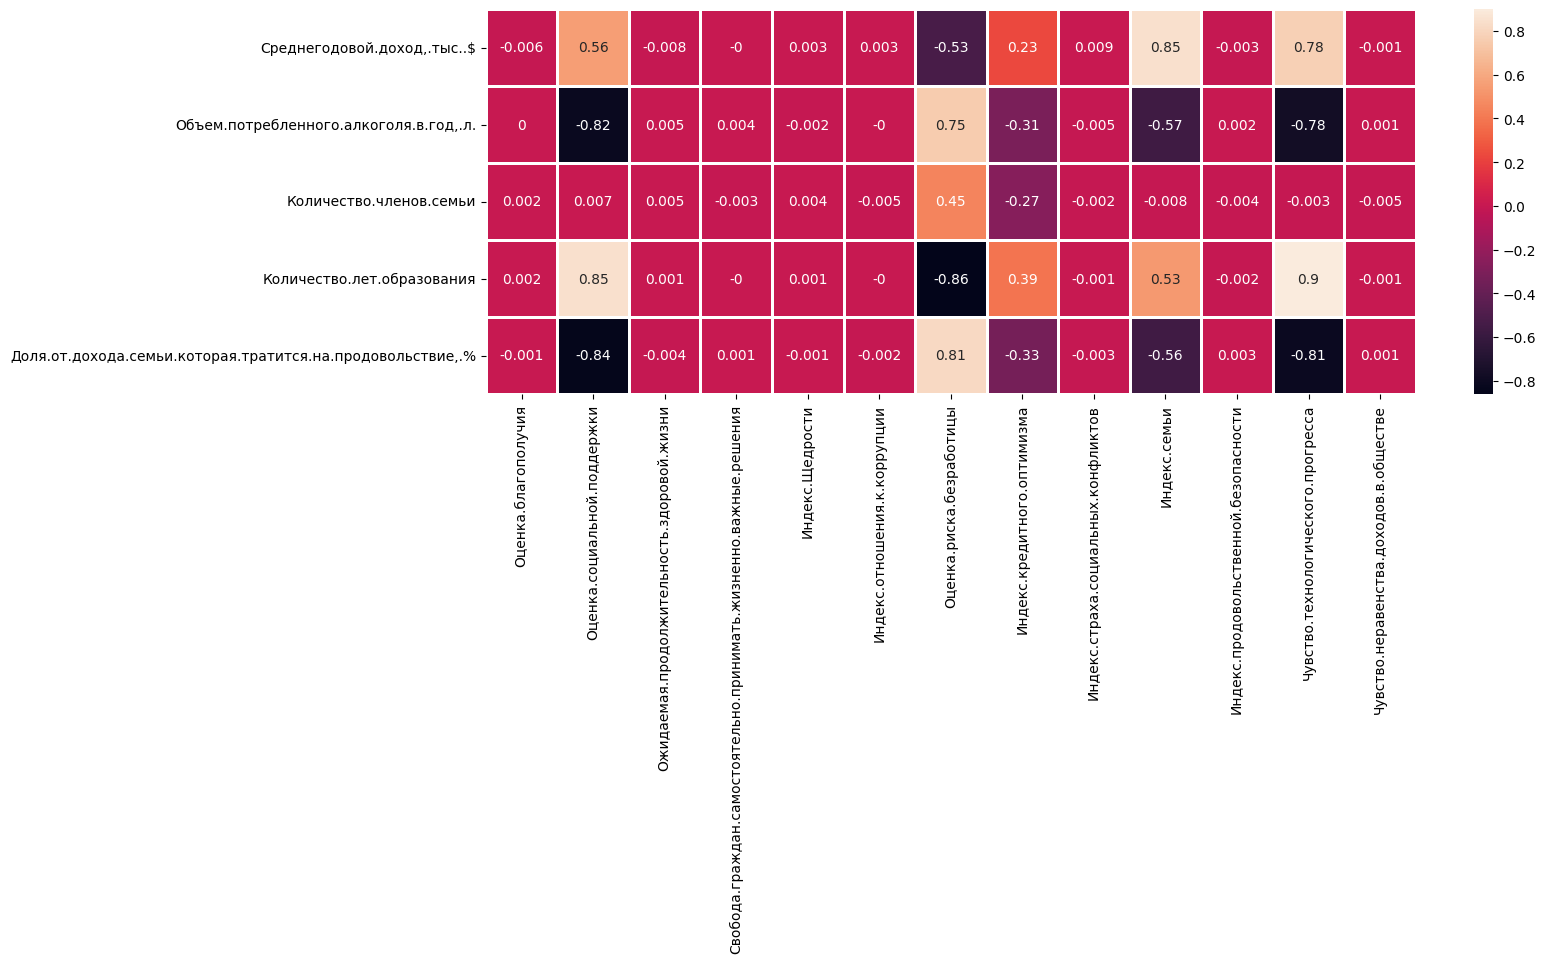

In [ ]:
plt.figure(figsize=(15,5))
src = [
    'Среднегодовой.доход,.тыс..$',
    'Объем.потребленного.алкоголя.в.год,.л.',
    'Количество.членов.семьи',
    'Количество.лет.образования',
    'Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%',
]
dst = [
    'Оценка.благополучия',
    'Оценка.социальной.поддержки',
    'Ожидаемая.продолжительность.здоровой.жизни',
    'Свобода.граждан.самостоятельно.принимать.жизненно.важные.решения',
    'Индекс.Щедрости',
    'Индекс.отношения.к.коррупции',
    'Оценка.риска.безработицы',
    'Индекс.кредитного.оптимизма',
    'Индекс.страха.социальных.конфликтов',
    'Индекс.семьи',
    'Индекс.продовольственной.безопасности',
    'Чувство.технологического.прогресса',
    'Чувство.неравенства.доходов.в.обществе',
]
correlation = knowns_dataset.corr().round(decimals=3).loc[src,dst].head(5)
#correlation
sea.heatmap(correlation, annot=True, linewidths=1)

Выявить корреляционные зависимости.

<Axes: >

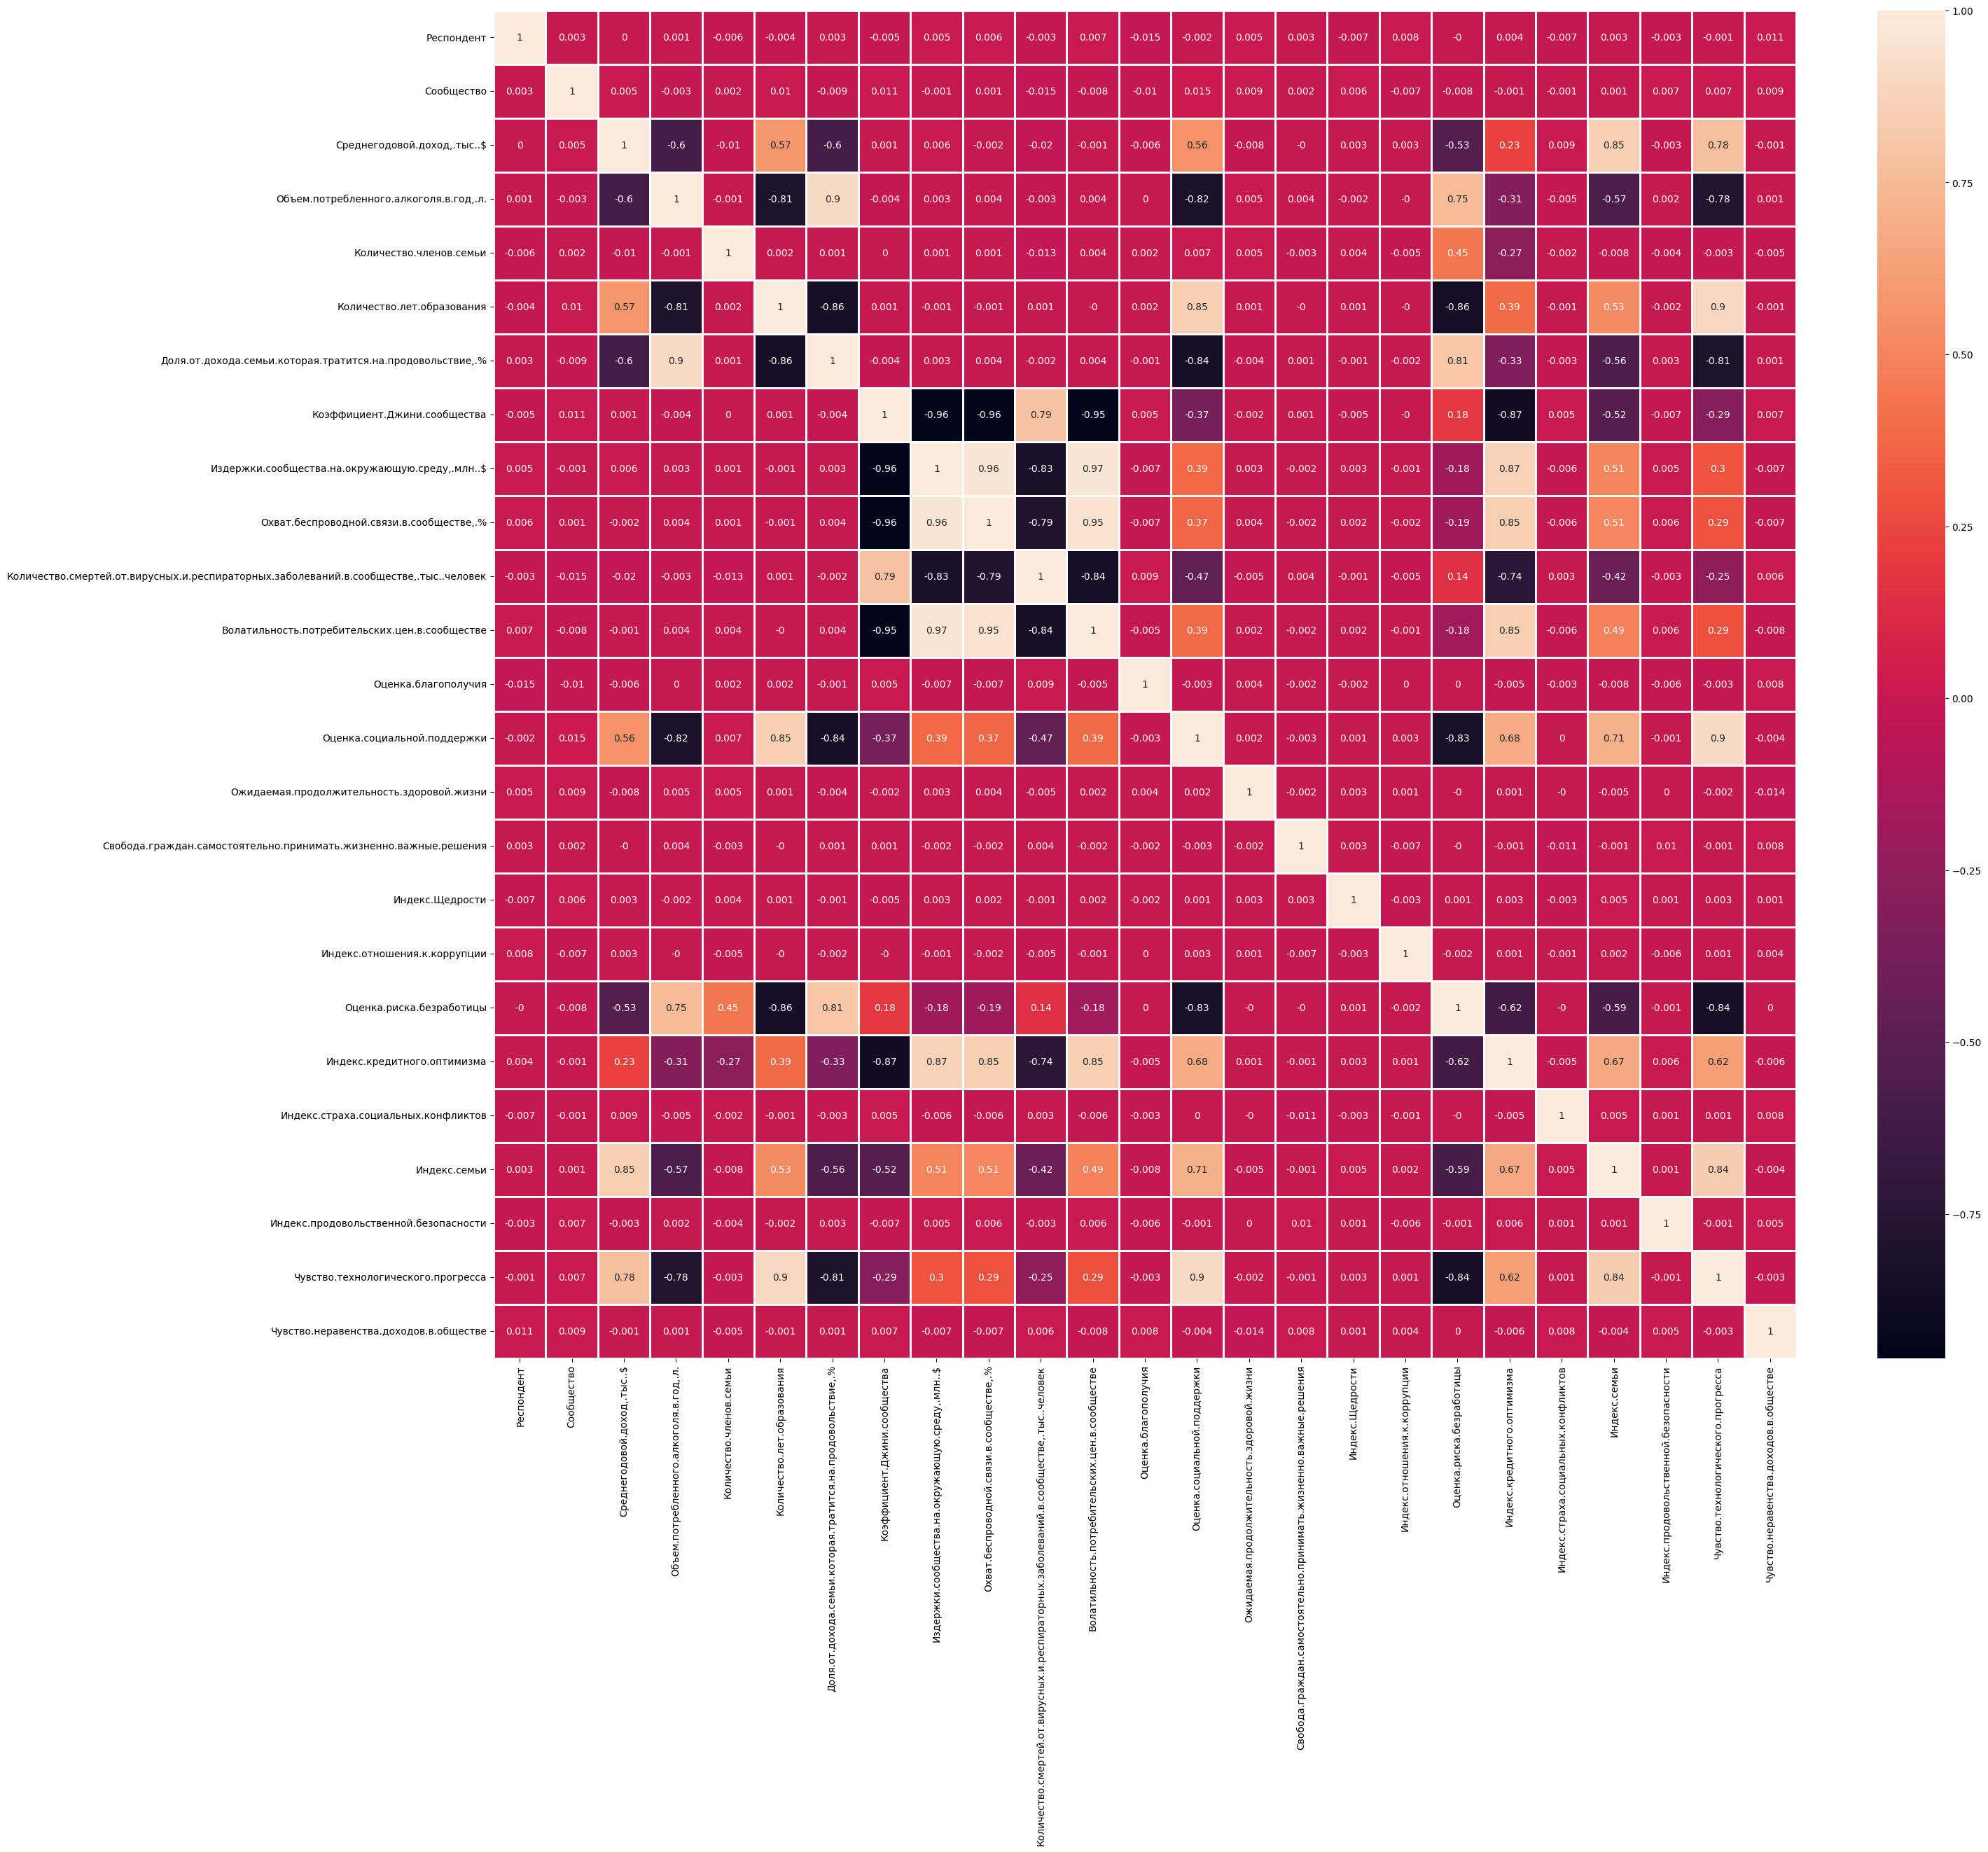

In [ ]:
plt.figure(figsize=(30,25))
correlation = knowns_dataset.corr().round(decimals=3)
#correlation
sea.heatmap(correlation, annot=True, linewidths=1)

Заполнить пропуски в данных.

In [ ]:
X_train = knowns_dataset[src]
y_train = knowns_dataset[dst]

X_test = unknowns_data[src]
y_test = unknowns_data[[elem.replace('.', ' ') for elem in dst]]

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Средняя абсолютная ошибка: {mae:.2f}')

dataset[dst] = dataset[dst].fillna(pd.DataFrame(y_pred, columns=dst))
dataset.head(15)

Средняя абсолютная ошибка: 17.98


,Респондент,Сообщество,"Среднегодовой.доход,.тыс..$","Объем.потребленного.алкоголя.в.год,.л.",Количество.членов.семьи,Количество.лет.образования,"Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%",Коэффициент.Джини.сообщества,"Издержки.сообщества.на.окружающую.среду,.млн..$","Охват.беспроводной.связи.в.сообществе,.%",...,Свобода.граждан.самостоятельно.принимать.жизненно.важные.решения,Индекс.Щедрости,Индекс.отношения.к.коррупции,Оценка.риска.безработицы,Индекс.кредитного.оптимизма,Индекс.страха.социальных.конфликтов,Индекс.семьи,Индекс.продовольственной.безопасности,Чувство.технологического.прогресса,Чувство.неравенства.доходов.в.обществе
0,1,480,21.350,62,4,5,65,0.608084,197.16,0.330140,...,78.000000,67.000000,69.000000,71.000000,38.000000,92.000000,11.000000,95.000000,16.000000,14.000000
1,2,130,622.613,30,7,21,39,0.369140,297.10,0.580329,...,9.000000,49.000000,29.000000,36.000000,66.000000,31.000000,49.000000,3.000000,72.000000,60.000000
2,3,156,400.896,45,2,8,45,0.345094,305.32,0.624832,...,35.000000,19.000000,73.000000,49.000000,61.000000,19.000000,39.000000,82.000000,38.000000,60.000000
3,4,69,375.950,56,5,10,68,0.635868,78.78,0.240157,...,95.000000,83.000000,50.000000,67.000000,35.000000,77.000000,28.000000,50.000000,33.000000,1.000000
4,5,330,925.782,39,6,18,38,0.787911,93.35,0.229719,...,84.000000,76.000000,62.000000,44.000000,40.000000,86.000000,51.000000,76.000000,64.000000,55.000000
5,6,591,303.851,44,1,14,51,0.121660,400.00,0.847125,...,87.000000,72.000000,84.000000,35.000000,83.000000,92.000000,42.000000,5.000000,54.000000,48.000000
6,7,494,833.042,34,2,18,38,0.291490,296.46,0.676323,...,50.611543,49.905637,50.398280,44.111215,51.826462,50.136054,17.717303,50.526062,32.567557,50.916794
7,8,113,777.380,44,2,18,41,0.891805,70.99,0.190797,...,45.000000,98.000000,3.000000,35.000000,42.000000,74.000000,41.000000,33.000000,59.000000,1.000000
8,9,330,921.139,38,1,19,34,0.787911,93.35,0.229719,...,63.000000,1.000000,21.000000,27.000000,49.000000,21.000000,51.000000,64.000000,66.000000,95.000000
9,10,140,310.367,52,7,11,42,0.206018,356.67,0.866146,...,97.000000,25.000000,5.000000,52.000000,64.000000,81.000000,40.000000,46.000000,45.000000,98.000000


In [ ]:
errors, r2s, correlations = [], [], []

print('Средняя абсолютная ошибка определения признаков состояния / R2 / суммарная корреляция с признаками причины\n')
for state_feature in dst:
  X_train = knowns_dataset[src]
  y_train = knowns_dataset[state_feature]

  X_test = unknowns_data[src]
  y_test = unknowns_data[state_feature.replace('.', ' ')]

  model = LinearRegression()
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred) * 100
  corr = correlation[state_feature].abs().sum()
  print(f'{state_feature}: {mae:.2f} / {r2:.2f} / {corr:.2f}')

  errors.append(mae)
  r2s.append(r2)
  correlations.append(corr)

  dataset[state_feature] = dataset[state_feature].fillna(pd.Series(y_pred))

dataset.head(15)

Средняя абсолютная ошибка определения признаков состояния / R2 / суммарная корреляция с признаками причины

Оценка.благополучия: 24.55 / -0.08 / 1.11
Оценка.социальной.поддержки: 5.94 / 77.62 / 9.20
Ожидаемая.продолжительность.здоровой.жизни: 24.66 / -0.05 / 1.09
Свобода.граждан.самостоятельно.принимать.жизненно.важные.решения: 24.87 / -0.02 / 1.07
Индекс.Щедрости: 24.90 / -0.01 / 1.07
Индекс.отношения.к.коррупции: 24.84 / -0.06 / 1.06
Оценка.риска.безработицы: 2.99 / 96.20 / 8.17
Индекс.кредитного.оптимизма: 14.41 / 20.67 / 9.32
Индекс.страха.социальных.конфликтов: 24.82 / 0.01 / 1.09
Индекс.семьи: 6.99 / 72.65 / 8.79
Индекс.продовольственной.безопасности: 25.06 / -0.05 / 1.09
Чувство.технологического.прогресса: 5.00 / 90.84 / 8.91
Чувство.неравенства.доходов.в.обществе: 24.76 / 0.01 / 1.13


,Респондент,Сообщество,"Среднегодовой.доход,.тыс..$","Объем.потребленного.алкоголя.в.год,.л.",Количество.членов.семьи,Количество.лет.образования,"Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%",Коэффициент.Джини.сообщества,"Издержки.сообщества.на.окружающую.среду,.млн..$","Охват.беспроводной.связи.в.сообществе,.%",...,Свобода.граждан.самостоятельно.принимать.жизненно.важные.решения,Индекс.Щедрости,Индекс.отношения.к.коррупции,Оценка.риска.безработицы,Индекс.кредитного.оптимизма,Индекс.страха.социальных.конфликтов,Индекс.семьи,Индекс.продовольственной.безопасности,Чувство.технологического.прогресса,Чувство.неравенства.доходов.в.обществе
0,1,480,21.350,62,4,5,65,0.608084,197.16,0.330140,...,78.000000,67.000000,69.000000,71.000000,38.000000,92.000000,11.000000,95.000000,16.000000,14.000000
1,2,130,622.613,30,7,21,39,0.369140,297.10,0.580329,...,9.000000,49.000000,29.000000,36.000000,66.000000,31.000000,49.000000,3.000000,72.000000,60.000000
2,3,156,400.896,45,2,8,45,0.345094,305.32,0.624832,...,35.000000,19.000000,73.000000,49.000000,61.000000,19.000000,39.000000,82.000000,38.000000,60.000000
3,4,69,375.950,56,5,10,68,0.635868,78.78,0.240157,...,95.000000,83.000000,50.000000,67.000000,35.000000,77.000000,28.000000,50.000000,33.000000,1.000000
4,5,330,925.782,39,6,18,38,0.787911,93.35,0.229719,...,84.000000,76.000000,62.000000,44.000000,40.000000,86.000000,51.000000,76.000000,64.000000,55.000000
5,6,591,303.851,44,1,14,51,0.121660,400.00,0.847125,...,87.000000,72.000000,84.000000,35.000000,83.000000,92.000000,42.000000,5.000000,54.000000,48.000000
6,7,494,833.042,34,2,18,38,0.291490,296.46,0.676323,...,50.611543,49.905637,50.398280,44.111215,51.826462,50.136054,17.717303,50.526062,32.567557,50.916794
7,8,113,777.380,44,2,18,41,0.891805,70.99,0.190797,...,45.000000,98.000000,3.000000,35.000000,42.000000,74.000000,41.000000,33.000000,59.000000,1.000000
8,9,330,921.139,38,1,19,34,0.787911,93.35,0.229719,...,63.000000,1.000000,21.000000,27.000000,49.000000,21.000000,51.000000,64.000000,66.000000,95.000000
9,10,140,310.367,52,7,11,42,0.206018,356.67,0.866146,...,97.000000,25.000000,5.000000,52.000000,64.000000,81.000000,40.000000,46.000000,45.000000,98.000000


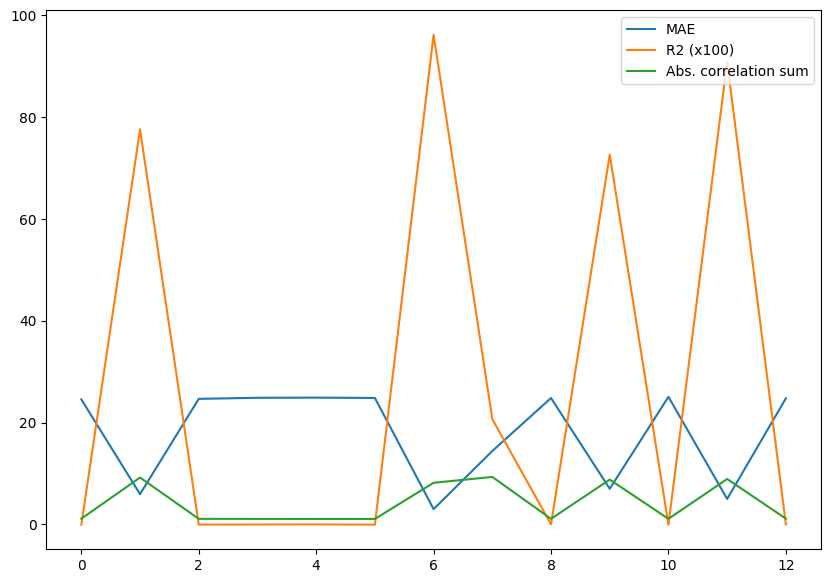

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(errors, label='MAE')
plt.plot(r2s, label='R2 (x100)')
plt.plot(correlations, label='Abs. correlation sum')
plt.legend(loc='upper right')
plt.show()

In [ ]:
src = [
    'Среднегодовой.доход,.тыс..$',
    'Количество.членов.семьи',
    'Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%',
]
dst = 'Индекс.отношения.к.коррупции'

X_train = knowns_dataset[src]
y_train = knowns_dataset[dst]

X_test = unknowns_data[src]
y_test = unknowns_data[dst.replace('.', ' ')]

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Средняя абсолютная ошибка: {mae:.2f}')

dataset[dst].head(15)

Средняя абсолютная ошибка: 24.84


,Индекс.отношения.к.коррупции
0,69.000000
1,29.000000
2,73.000000
3,50.000000
4,62.000000
5,84.000000
6,50.398280
7,3.000000
8,21.000000
9,5.000000


In [ ]:
src = [
    'Среднегодовой.доход,.тыс..$',
    'Объем.потребленного.алкоголя.в.год,.л.',
    'Количество.лет.образования',
    'Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%',
]
dst = 'Индекс.семьи'

X_train = knowns_dataset[src]
y_train = knowns_dataset[dst]

X_test = unknowns_data[src]
y_test = unknowns_data[dst.replace('.', ' ')]

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Средняя абсолютная ошибка: {mae:.2f}')

dataset[dst].head(15)

Средняя абсолютная ошибка: 6.99


,Индекс.семьи
0,11.000000
1,49.000000
2,39.000000
3,28.000000
4,51.000000
5,42.000000
6,17.717303
7,41.000000
8,51.000000
9,40.000000
